In [2]:
# Calcuate RSS 
def get_residual_sum_of_sqaure(y_obs, y_hat):
    residuals = y_obs - y_hat 
    RSS = (residuals ** 2).sum()
    return RSS

def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predicted_values = intercept + (slope * input_feature)
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = output - predicted_values
    # square the residuals and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)

In [3]:
def simple_linear_regression(input_feature, output):
    x = input_feature
    y = output 
    slope =np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x),x)), np.transpose(x)) , y)
    intercept = y.mean() - np.dot(x.mean(), slope)
    return intercept, slope

In [4]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = intercept + (slope * input_feature)
    return predicted_values

In [5]:
def get_numpy_data(df):
    df['constant'] = 1
    df = pd.concat([df['constant'],df.iloc[:,:-2]],axis = 1)
    df = df.values
    return df

In [6]:
def get_prediction_output(feature_matrix, weights):
    res = np.dot(feature_matrix, weights)
    return res

In [7]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative

In [8]:
def regression_gradient_descent(feature_matrix,output, initial_weights,step_size,tolerence):
    converged = False 
    weights = np.array(initial_weights)
    while not converged:
        #computing the prediction base on feature matrix and weights 
        prediction = get_prediction_output(feature_matrix,weights)
        errors = prediction - output
        gradient_sum_square = 0 ## initial the gradient sum of squares 
        for i in range(len(weights)):
            derivatives = feature_derivative(errors, feature_matrix[:,i])
            # add sum of sqaured value of the derivative to the gradient magnitide
            gradient_sum_square +=  derivatives ** 2
            weights[i]-= (step_size * derivatives)
        gradient_magnitude = np.sqrt(gradient_sum_square)
        print(gradient_magnitude)
        if  gradient_magnitude < tolerence:
            coverged = True
        return weights          

In [9]:
## polynomial regression 
## generate polynomial degeree
def polynomial_frame(feature,degree):
    df = pd.DataFrame()
    df['power_1'] = feature 
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' +str(power)
            df[name] = feature ** power
    return df

In [10]:
def feature_derivative_ridge(feature, output, l2_penalty, feature_is_constant):
    if feature_is_constant == True:
        derivative = 2 * np.dot(feature, error)
    else:
        derivative = 2 * np.dot(feature, error) + 2 * l2_penalty* weight 
    return derivative

In [11]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = np.array(initial_weights) # make sure it's a numpy array
    
    #while not reached maximum number of iterations:
    while max_iterations > 0:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)

            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - (step_size * derivative)
        max_iterations -= 1            
    return weights

In [12]:
def normlized_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix,axis = 0 )
    normalized_feature = feature_matrix/norms
    return normalized_feature, norms
# test 
#normalized_feature, norms = normlized_features (data_value)

In [13]:
#implement coordinate descent with normalized feature 
# minimize lasso cost function 
#signal coordinate descent 
def lasso_coordinate_descent_step(i,feature_matrix, output,weights, l1_penalty):
    prediction = np.dot(feature_matrix , weights)
    error = prediction - output 
    ro_i = (feature_matrix[:,i] *(output - prediction + (weight[i]* feature_matrix[:,i]))).sum()    
    if i == 0:
        new_weight_i = ro_i
    elif ro_i< l1_penalty /2:
        new_weight = ro_i + l1_penalty/2 
    elif ro_i > l2_penalty /2 :
        new_weight = ro_i - l1_penalty/2 
    else :
        new_weight = 0 
    return new_weight

In [14]:
def lasso_cyclical_coordinate_descent(feature_matrix, output, initial_weights, l1_penalty, tolerance):
    D = feature_matrix.shape[1]
    weights = np.array(initial_weigths)
    change = np.array(initial_weights) * 0
    converged = false
    
    while not converged:
        for idx in range(D):
            new_weight = lasso_coordinate_descent_step(i,feature_matrix, output,weights, l1_penalty)
            ## this change only store for 1 step of all the feature 
            change[idx] = np.abs(new_weight - weights[idx])
            weights[idx] = new_weight
        max_change = max(change)
        if max_change < tolerance:
            converged = True
    return weights

In [39]:
def compute_distance(train_matrix, query_matrix):
    diff = train_matrix - query_matrix 
    distance = np.sqrt(np.sum(diff**2,axis = 1))
    return distance 

In [40]:
x = data_value[:4,:]
y = data_value[5,:]

In [94]:
def compute_k_nearest_neighbors(k,train_matrix,feature_vector):
    distance = compute_distance(train_matrix,feature_vector)
    k_neighbors= np.argsort(distance, axis = 0)[:k]
    return k_neighbors 

In [95]:
def compute_distance_k_avg(k,train_matrix,output_value,feature_vector):
    k_neighbors = compute_k_nearest_neighbors(k,train_matrix,feature_vector)
    avg_output =np.mean(output_value[k_neighbors])
    #print(output_value[k_neighbors])
    return avg_output

In [100]:
def comput_distance_k_all(k,train_matrix,output_value,feature_vector):
    num_of_rows = feature_vector.shape[0]
    predict_value = []
    for i in range(num_of_rows):
        avg_value = compute_distance_k_avg(k,train_matrix,output_value,feature_vector)
        predict_value.append(avg_value)
        return predict_value

In [114]:
def grid_search_for_k_num(train_matrix,output_value,feature_vector,obs):
    
    for k in range(1,16):
        predict_value = comput_distance_k_all(k,train_matrix,output_value,feature_vector)
        rss = np.sqrt(np.sum((predict_value - obs)**2))
        #plt the resut 
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(k,rss)
    return rss


In [115]:
query_vector = data_value[1,:-1]
query_output = data_value[1,-1]
train_matrix = data_value[1:,:-1]
output_matrix = data_value[1:,-1]

0.0

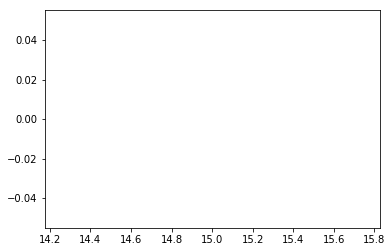

In [117]:
grid_search_for_k_num(train_matrix,output_matrix,query_vector,query_output)

In [110]:
import pandas as pd 
import numpy as np

In [17]:
data = pd.read_csv("clean_median_metrix_data.csv")
data = data.dropna()
data['spread'] = data['spread']/1000
data['target_median'] = data['target_median']/1000
data.head()

,spread,target_median,number_KNN,ABS Metrics,fsignal
1,1.000,1.000,1.0,0.00,0.0
3,1.393,1.393,1.0,0.00,0.0
5,1.610,1.824,2.0,0.12,0.0
7,1.018,1.018,1.0,0.00,0.0
9,2.517,1.345,4.0,0.87,0.0


In [72]:
data_value = get_numpy_data(data)
query_vector = data_value[1,-1]
feature_matrix = data_value[1:,:-1]
output_matrix = data_value[1:,-1]

In [51]:
data_value.shape

(2537, 5)

In [20]:
my_weight = np.array([0,0,0,0])
my_feature = data_value[:,:-1]

In [21]:
intercept, slope = simple_linear_regression( data_value[:,:-1],data_value[:,-1])

In [22]:
example_output = data_value[:,-1]

In [23]:
test_prediction = get_prediction_output(my_feature , my_weight)
error = test_prediction - example_output 
derivative = feature_derivative(error , my_feature )
print(derivative)

[ -586.62    -8879.37622   402.54682 -4711.6    ]


In [24]:
np.sum(example_output )**2 

86030.75610000003

In [25]:
feature_matrix = data_value[:,:-1]
output = data_value[:,-1]
initial_weights = np.array([0,0,0,0])
step_size = 10-6
tolerence =2.5e100
penalty = 100
weights_regression = regression_gradient_descent(feature_matrix,output, initial_weights,step_size,tolerence)


10077.135683466488


In [26]:
tmp = pd.DataFrame([1,2,3])
tmp_cubic = tmp.apply(lambda x:x**3)
polynomial_frame(tmp.iloc[:,0].values,3)

,power_1,power_2,power_3
0,1,1,1
1,2,4,8
2,3,9,27


In [27]:
penalty = 100
regression_gradient_descent_l2_penalty(feature_matrix, output,initial_weights, step_size,
                                           tolerence, penalty)

NameError: name 'regression_gradient_descent_l2_penalty' is not defined

In [ ]:
l2_penalty = 10
ridge_regression_gradient_descent(feature_matrix, output, initial_weights,
                                  step_size, l2_penalty, max_iterations=100)